In [ ]:
# change wokring directory to the root of the project (where jupyter was started)
import os
import psutil
%cd {psutil.Process(os.getpid()).parent().cwd()}

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
from imageio import imread
import numpy as np
import os
from os.path import join
import scripts.CNN.train_interactions
import pandas as pd
from scripts.CNN.interactions_results import toarray, tostruct
import warnings
pd.set_option('precision', 2)

In [7]:
DATA_DIR = '/home/matej/prace/ferda/data/interactions/1712_1k_36rot'
EXPERIMENT_DIR = '/home/matej/prace/ferda/experiments/171221_0137_batch_relu'
SUB_EXPERIMENT = 0.666666666667

In [9]:
y_test = pd.read_csv(join(DATA_DIR, 'test.csv'))    

with h5py.File(join(EXPERIMENT_DIR, str(SUB_EXPERIMENT), 'predictions.h5'), 'r') as hf:
    pred = hf['data'][:]
    pred_df = pd.DataFrame(tostruct(pred))
    
loss_alpha_batch = pd.read_csv(join(EXPERIMENT_DIR, 'results.csv'))    

# gt out of image test

In [10]:
hf = h5py.File(join(DATA_DIR, 'images.h5'), 'r')
X_train = hf['train']
X_test = hf['test']
y_train = pd.read_csv(join(DATA_DIR, 'train.csv'))   

In [11]:
y_train.describe()

,ant1_x,ant1_y,ant1_major,ant1_minor,ant1_angle_deg,ant2_x,ant2_y,ant2_major,ant2_minor,ant2_angle_deg,ant1_id,ant2_id,theta_rad,phi_rad,overlap_px,augmentation_angle_deg
count,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00,36000.00
mean,100.01,100.00,66.37,18.24,187.74,100.01,100.00,66.62,18.38,178.27,33104.04,33347.12,0.06,0.01,4.90,175.00
std,14.41,14.41,9.14,2.72,103.25,10.68,10.68,9.70,2.93,103.74,5945.54,5833.07,1.84,0.72,4.89,103.88
min,53.90,53.00,25.30,10.60,0.00,59.00,58.80,27.70,10.50,0.00,22902.00,22818.00,-3.10,-1.40,0.00,0.00
25%,88.50,88.50,63.00,16.70,99.30,92.00,92.00,63.60,16.80,88.40,27783.25,28172.50,-1.50,-0.50,1.00,87.50
50%,100.00,100.00,68.10,18.10,194.90,100.00,100.00,68.95,18.25,176.50,32259.50,33334.00,0.05,-0.00,3.50,175.00
75%,111.50,111.60,73.00,19.60,276.70,108.00,108.10,73.62,19.70,268.10,39028.50,38813.50,1.70,0.50,7.00,262.50
max,147.00,146.10,78.40,32.30,360.00,140.90,140.70,78.30,39.10,360.00,43334.00,43306.00,3.10,1.40,42.00,350.00


In [12]:
# end of the test

In [13]:
loss_alpha_batch[loss_alpha_batch['loss_alpha'] == SUB_EXPERIMENT]

,Unnamed: 0,xy MAE,angle MAE,loss_alpha
6,6,4.98,9.34,0.67


In [14]:
loss_alpha_batch['xy MAE'].iloc[-1] = np.nan
xy = loss_alpha_batch['xy MAE']
loss_alpha_batch['xy MAE norm'] = (xy - xy.mean()) / xy.std()
#loss_alpha_batch['angle MAE'].iloc[0] = np.nan
angle = loss_alpha_batch['angle MAE']
loss_alpha_batch['angle MAE norm'] = (angle - angle.mean()) / angle.std()
loss_alpha_batch['sum norm'] = loss_alpha_batch['angle MAE norm'] + loss_alpha_batch['xy MAE norm']
loss_alpha_batch['alpha sum norm'] = loss_alpha_batch['angle MAE norm'] * (1 - loss_alpha_batch['loss_alpha']) + \
                                     loss_alpha_batch['xy MAE norm'] * loss_alpha_batch['loss_alpha']

/home/matej/.virtualenvs/ferda/lib/python2.7/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
# ax = loss_alpha_batch.plot('loss_alpha', ['xy MAE norm', 'angle MAE norm', 'alpha sum norm'], 
#                            title='normalized mean absolute errors')
# ax.legend(['xy', 'angle', 'alpha weighted sum'])
# ax.set_xlabel('alpha')

/home/matej/.virtualenvs/ferda/lib/python2.7/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


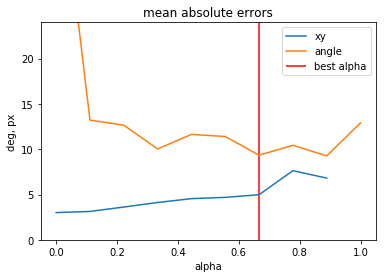

In [16]:
ax = loss_alpha_batch.plot('loss_alpha', ['xy MAE', 'angle MAE'], title='mean absolute errors')
ax.set_ylabel('deg, px')
ax.set_xlabel('alpha')
ax.set_ylim(0, 24)
ax.vlines(SUB_EXPERIMENT, ax.get_ylim()[0], ax.get_ylim()[1],
          'r')
ax.legend(['xy', 'angle', 'best alpha'])

# Predictions

In [17]:
pred_df.describe()

,0_x,0_y,0_major,0_minor,0_angle_deg,1_x,1_y,1_major,1_minor,1_angle_deg
count,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00,3600.00
mean,92.19,106.25,22.42,60.01,-89.25,108.08,94.23,10.49,-51.38,-67.30
std,8.58,9.80,26.19,23.16,51.32,9.34,10.79,11.34,11.75,53.68
min,72.92,76.20,-38.94,22.81,-214.00,80.73,66.98,-33.33,-88.26,-199.10
25%,85.53,98.89,0.58,43.76,-130.74,101.08,86.36,4.09,-60.59,-110.17
50%,91.04,107.26,23.35,53.59,-92.09,109.11,92.45,12.55,-52.32,-68.01
75%,98.18,113.45,42.76,69.85,-46.17,115.01,102.57,17.44,-40.52,-24.81
max,117.77,131.45,83.27,171.88,34.20,130.70,124.77,54.54,-25.41,59.29


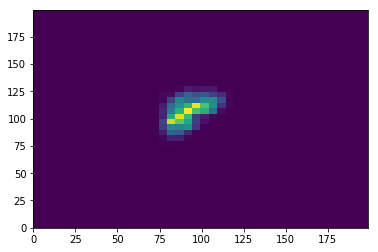

In [9]:
_ = plt.hist2d(pred_df['ant1_x'], pred_df['ant1_y'], bins=40, range=((0, 199), (0, 199)))

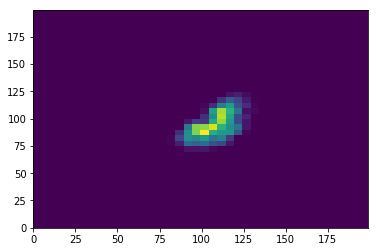

In [10]:
_ = plt.hist2d(pred_df['ant2_x'], pred_df['ant2_y'], bins=40, range=((0, 199), (0, 199)))

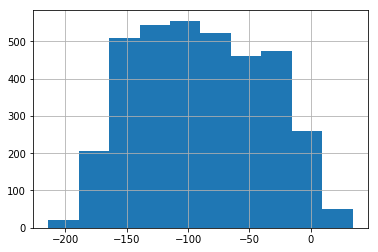

In [11]:
pred_df['ant1_angle_deg'].hist()

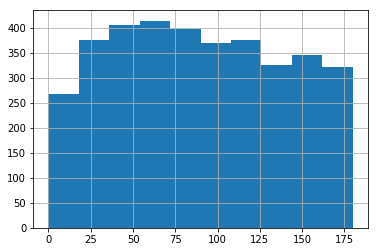

In [12]:
(pred_df['ant1_angle_deg'] % 180).hist()

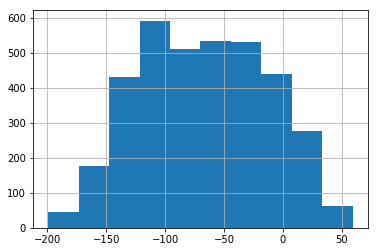

In [13]:
pred_df['ant2_angle_deg'].hist()

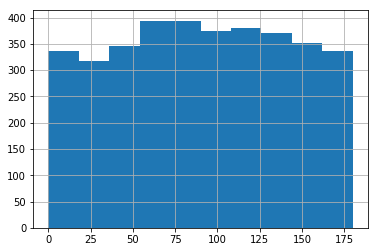

In [14]:
(pred_df['ant2_angle_deg'] % 180).hist()

# Prediction Errors

In [30]:
pred_df

,0_x,0_y,0_major,0_minor,0_angle_deg,1_x,1_y,1_major,1_minor,1_angle_deg
0,80.08,96.82,1.83,39.18,-8.10,114.95,96.06,15.10,-57.32,-25.68
1,98.85,92.01,1.04,47.45,-39.77,112.97,118.03,22.13,-74.93,1.76
2,91.89,108.38,60.54,52.32,-126.02,114.46,86.77,-5.75,-53.96,-64.55
3,95.46,113.00,25.93,48.47,-98.38,101.55,88.56,14.99,-38.03,-102.04
4,102.39,112.92,10.81,81.90,-81.22,93.49,84.37,14.12,-39.84,-153.72
5,86.41,98.86,-36.29,60.91,-11.22,123.64,108.60,16.70,-63.31,5.15
6,87.08,108.01,27.83,32.75,-80.97,114.43,99.91,36.25,-64.15,19.15
7,86.27,89.62,-9.25,64.43,-54.30,116.37,123.65,18.87,-65.77,-17.59
8,103.98,105.06,25.31,44.54,-94.24,92.14,87.01,17.35,-47.68,-88.95
9,89.53,112.86,41.64,64.72,-149.40,106.81,93.00,-1.49,-39.37,-110.28


In [34]:
xy, angle, indices = scripts.CNN.train_interactions.match_pred_to_gt(pred, y_test[scripts.CNN.train_interactions.columns(2)].values, np)
xy_errors = (xy[indices[:, 0], indices[:, 1]])
angle_errors = (angle[indices[:, 0], indices[:, 1]])

# swap = indices[:, 0] == 1
# pred_swapped = pred.copy()
# pred_swapped[swap, :5], pred_swapped[swap, 5:] = pred_swapped[swap, 5:], pred_swapped[swap, :5]

In [39]:
xy_errors

array([ 4.24,  5.69,  2.97, ...,  4.02,  3.08,  4.21])

In [45]:
np.take(xy, indices, axis=1)
#     angle_mae = np.take(angle, indices).mean()

array([[[ 33.95,  37.6 ],
        [ 33.95,  33.95],
        [ 33.95,  32.21],
        ..., 
        [ 33.95,  24.14],
        [ 33.95,  20.37],
        [ 33.95,  30.83]],

       [[  5.69,   4.24],
        [  5.69,   5.69],
        [  5.69,   2.97],
        ..., 
        [  5.69,   4.02],
        [  5.69,   3.08],
        [  5.69,   4.21]]])

In [42]:
xy

array([[ 37.6 ,  33.95,  32.21, ...,  24.14,  20.37,  30.83],
       [  4.24,   5.69,   2.97, ...,   4.02,   3.08,   4.21]])

In [16]:
df = pd.DataFrame.from_items([('xy (px)', [xy_errors.mean()]), 
                              ('angle (deg)', angle_errors.mean()),])
df.style.set_caption('MAE')
df

,xy (px),angle (deg)
0,4.98,9.34


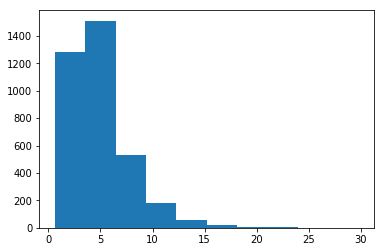

In [17]:
_  = plt.hist(xy_errors)

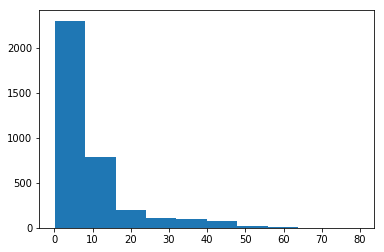

In [18]:
_ = plt.hist(angle_errors)

# Model

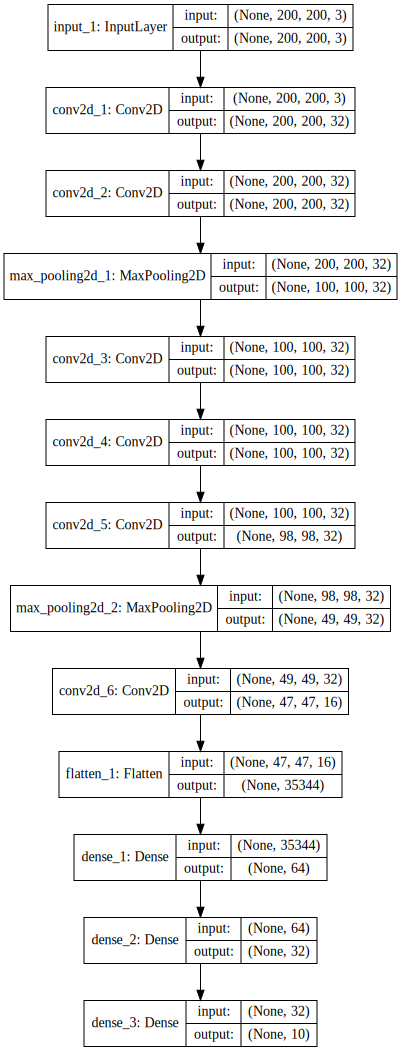

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

model = train_interactions.model()
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [83]:
# SVG(model_to_dot(model.get_layer('model_1'), show_shapes=True).create(prog='dot', format='svg'))